# Simple Camera Models with NumPy and Matplotlib

In [12]:
#%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

from camera_models import * # importing packages


DECIMALS = 2  # how many decimal places to use in print



%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Homogeneous Coordinates

In what follows, we will use **homogeneous coordinates** to simplify some operations.

To transform a vector into homogeneous coordinates just add a 1 at the end of it:

In [13]:
X = np.array([4.0, 2.0, 3.0])
print(f"X: {X}")
Xh = to_homogeneus(X)
print(f"X in homogeneous coordinates: {Xh}")

X: [4. 2. 3.]
X in homogeneous coordinates: [4. 2. 3. 1.]


To go from homogeneous coordinates to normal coordinates just divide all elements by the last coordinate and remove it:

In [14]:
Xh = np.array([8.0, 4.0, 6.0, 2.0])
print(f"X in homogeneous coordinates: {Xh}")
X = to_inhomogeneus(Xh)
print(f"X: {X}")

X in homogeneous coordinates: [8. 4. 6. 2.]
X: [4. 2. 3.]


## Camera Translation and Rotation

### Camera Translation

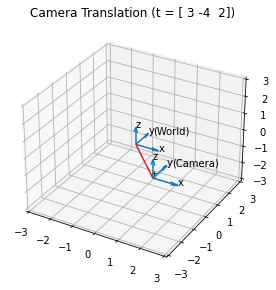

In [15]:
world_origin = np.zeros(3)
dx, dy, dz = np.eye(3)
t = np.array([3, -4, 2])
world_frame = ReferenceFrame(
    origin=world_origin, 
    dx=dx, 
    dy=dy,
    dz=dz,
    name="World",
)
camera_frame = ReferenceFrame(
    origin=t,
    dx=dx, 
    dy=dy,
    dz=dz,
    name="Camera",
)

ax = plt.axes(projection="3d")
world_frame.draw3d()
camera_frame.draw3d()
draw3d_arrow(world_origin, t, color="tab:red", name="t")
set_xyzlim3d(-3, 3)
ax.set_title(f"Camera Translation (t = {t})")
plt.tight_layout()
plt.show()

### Camera Rotation

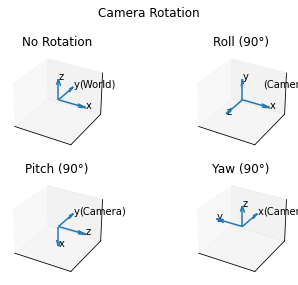

In [16]:
Rx = get_rotation_matrix(theta_x=np.pi / 2.0)
Ry = get_rotation_matrix(theta_y=np.pi / 2.0)
Rz = get_rotation_matrix(theta_z=np.pi / 2.0)
dx, dy, dz = np.eye(3)
world_frame = ReferenceFrame(
    origin=np.zeros(3), 
    dx=dx, 
    dy=dy,
    dz=dz,
    name="World",
)
roll_frame = ReferenceFrame(
    origin=np.zeros(3), 
    dx=Rx @ dx, 
    dy=Rx @ dy,
    dz=Rx @ dz,
    name="Camera",
)
pitch_frame = ReferenceFrame(
    origin=np.zeros(3), 
    dx=Ry @ dx, 
    dy=Ry @ dy,
    dz=Ry @ dz,
    name="Camera",
)
yaw_frame = ReferenceFrame(
    origin=np.zeros(3), 
    dx=Rz @ dx, 
    dy=Rz @ dy,
    dz=Rz @ dz,
    name="Camera",
)
fig = plt.figure()

ax = fig.add_subplot(2, 2, 1, projection="3d")
world_frame.draw3d()
set_xyzlim3d(-1, 1)
set_xyzticks([])
ax.set_title(f"No Rotation")

ax = fig.add_subplot(2, 2, 2, projection="3d")
roll_frame.draw3d()
set_xyzlim3d(-1, 1)
ax.set_title(f"Roll (90°)")
set_xyzticks([])

ax = fig.add_subplot(2, 2, 3, projection="3d")
pitch_frame.draw3d()
set_xyzlim3d(-1, 1)
set_xyzticks([])
ax.set_title(f"Pitch (90°)")

ax = fig.add_subplot(2, 2, 4, projection="3d")
yaw_frame.draw3d()
set_xyzlim3d(-1, 1)
set_xyzticks([])
ax.set_title(f"Yaw (90°)")

fig.suptitle("Camera Rotation")
plt.tight_layout()
plt.show()

## Pinhole Camera Geometry

In [17]:
F = 3.0  # focal length
PX= 2.0  # principal point x-coordinate
PY= 1.0  # principal point y-coordinate
THETA_X = np.pi / 2  # roll angle
THETA_Z = np.pi  # yaw angle
C = np.array([3, -5, 2])  # camera centre
IMAGE_HEIGTH = 4
IMAGE_WIDTH = 6

In [18]:
R = get_rotation_matrix(theta_x=THETA_X, theta_z=THETA_Z)
world_origin = np.zeros(3)
dx, dy, dz = np.eye(3)
world_frame = ReferenceFrame(
    origin=world_origin, 
    dx=dx, 
    dy=dy,
    dz=dz,
    name="World",
)
camera_frame = ReferenceFrame(
    origin=C, 
    dx=R @ dx, 
    dy=R @ dy,
    dz=R @ dz,
    name="Camera",
)
Z = PrincipalAxis(
    camera_center=camera_frame.origin,
    camera_dz=camera_frame.dz,
    f=F,
)
image_frame = ReferenceFrame(
    origin=Z.p - camera_frame.dx * PX - camera_frame.dy * PY, 
    dx=R @ dx, 
    dy=R @ dy,
    dz=R @ dz,
    name="Image",
)
image_plane = ImagePlane(
    origin=image_frame.origin, 
    dx=image_frame.dx, 
    dy=image_frame.dy, 
    heigth=IMAGE_HEIGTH,
    width=IMAGE_WIDTH,
)

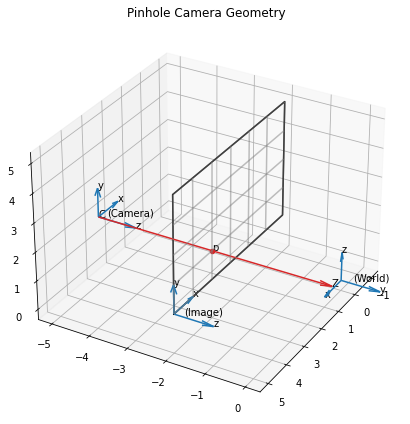

In [19]:
fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection="3d")
ax.text(*C, "C")
world_frame.draw3d()
camera_frame.draw3d()
image_frame.draw3d()
Z.draw3d()
image_plane.draw3d()
ax.view_init(elev=30.0, azim=30.0)
ax.set_title("Pinhole Camera Geometry")
plt.tight_layout()
plt.show()

## Representation of a Generic Point in 3D

### Intersection Between a Line and a Plane

In [20]:
X = np.array([-1, 2, 3])
G = GenericPoint(X, name="X")
L = get_plucker_matrix(C, X)
X1 = image_frame.origin
X2 = X1 + image_frame.dx
X3 = X1 + image_frame.dy
pi = get_plane_from_three_points(X1, X2, X3)
x = to_inhomogeneus(L @ pi)
print(f"X:\n{X}")
print(f"\nL:\n{L.round(DECIMALS)}")
print(f"\nX1:\n{X1}")
print(f"\nX2:\n{X2}")
print(f"\nX3:\n{X3}")
print(f"\npi:\n{pi.round(DECIMALS)}")
print(f"\nx:\n{x.round(DECIMALS)}")

X:
[-1  2  3]

L:
[[  0   1  11   4]
 [ -1   0 -19  -7]
 [-11  19   0  -1]
 [ -4   7   1   0]]

X1:
[ 5. -2.  1.]

X2:
[ 4. -2.  1.]

X3:
[ 5. -2.  2.]

pi:
[0. 1. 0. 2.]

x:
[ 1.29 -2.    2.43]


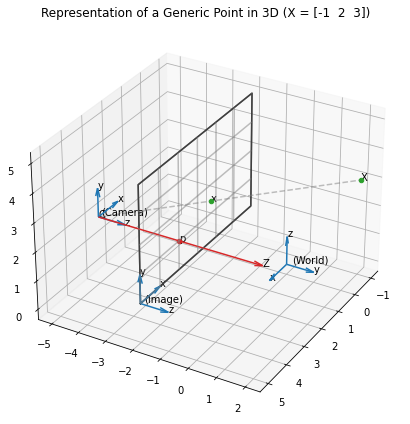

In [21]:
fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection="3d")
ax.text(*C, "C")
world_frame.draw3d()
camera_frame.draw3d()
image_frame.draw3d()
Z.draw3d()
image_plane.draw3d()
G.draw3d(pi, C=C)
ax.view_init(elev=30.0, azim=30.0)
ax.set_title(f"Representation of a Generic Point in 3D (X = {X})")
plt.tight_layout()
plt.show()

## Camera Calibration Matrix

In [22]:
F = 3.0  # focal length
PX= 2.0  # principal point x-coordinate
PY= 1.0  # principal point y-coordinate
IMAGE_HEIGTH = 4
IMAGE_WIDTH = 6

In [23]:
X = np.array([-1, 2, 3])
Xh = to_homogeneus(X)
K = get_calibration_matrix(F, px=PX, py=PY)
P = get_projection_matrix(F, px=PX, py=PY)
xh = P @ Xh
x = to_inhomogeneus(xh)
print("\nX:\n", X)
print("\nCalibration matrix (K):\n", K)
print("\nProjection matrix (P):\n", P)
print("\nx:\n", x)


X:
 [-1  2  3]

Calibration matrix (K):
 [[3. 0. 2.]
 [0. 3. 1.]
 [0. 0. 1.]]

Projection matrix (P):
 [[3. 0. 2. 0.]
 [0. 3. 1. 0.]
 [0. 0. 1. 0.]]

x:
 [1. 3.]


In [24]:
image = Image(heigth=IMAGE_HEIGTH, width=IMAGE_WIDTH)
G = GenericPoint(X, name="X")

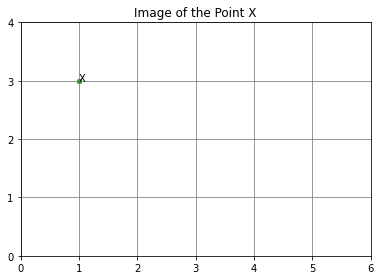

In [25]:
fig = plt.figure(figsize=(IMAGE_WIDTH, IMAGE_HEIGTH))
ax = fig.gca()
image.draw()
G.draw(F, px=PX, py=PY)
ax.set_title("Image of the Point X")
plt.tight_layout()
plt.show()

## CCD Cameras

In [26]:
MX = 2  # number of pixels per unit distance in image coordinates in x direction
MY = 0.5  # number of pixels per unit distance in image coordinates in y direction

In [27]:
X = np.array([-1, 2, 3])
Xh = to_homogeneus(X)
K = get_calibration_matrix(F, px=PX, py=PY, mx=MX, my=MY)
P = get_projection_matrix(F, px=PX, py=PY, mx=MX, my=MY)
xh = P @ Xh
x = to_inhomogeneus(xh)
print("\nX:\n", X)
print("\nCalibration matrix (K):\n", K)
print("\nProjection matrix (P):\n", P)
print("\nx:\n", x)


X:
 [-1  2  3]

Calibration matrix (K):
 [[6.  0.  4. ]
 [0.  1.5 0.5]
 [0.  0.  1. ]]

Projection matrix (P):
 [[6.  0.  4.  0. ]
 [0.  1.5 0.5 0. ]
 [0.  0.  1.  0. ]]

x:
 [2.  1.5]


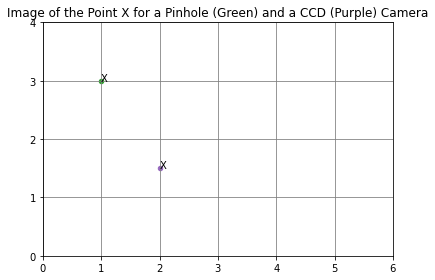

In [28]:
fig = plt.figure(figsize=(IMAGE_WIDTH, IMAGE_HEIGTH))
ax = fig.gca()
image.draw()
G.draw(F, px=PX, py=PY)
G.draw(F, px=PX, py=PY, mx=MX, my=MY, color="tab:purple")
ax.set_title("Image of the Point X for a Pinhole (Green) and a CCD (Purple) Camera")
plt.tight_layout()
plt.show()

As you can see from the graph, the coordinates of the point are multiplied by $m_x$ and $m_y$.

## Camera Projection Matrix

In [29]:
FOCAL_LENGTH = 3.0  # focal length
PX= 2.0  # principal point x-coordinate
PY= 1.0  # principal point y-coordinate
MX = 1.0  # number of pixels per unit distance in image coordinates in x direction
MY = 1.0  # number of pixels per unit distance in image coordinates in y direction
THETA_X = np.pi / 2.0  # roll angle
THETA_Y = 0.0  # pitch angle
THETA_Z = np.pi  # yaw angle
C = np.array([3, -5, 2])  # camera centre
IMAGE_HEIGTH = 4
IMAGE_WIDTH = 6


calibration_kwargs = {"f": FOCAL_LENGTH, "px": PX, "py": PY, "mx": MX, "my": MY}
rotation_kwargs = {"theta_x": THETA_X, "theta_y": THETA_Y, "theta_z": THETA_Z}
projection_kwargs = {**calibration_kwargs, **rotation_kwargs, "C": C}

In [30]:
K = get_calibration_matrix(**calibration_kwargs)
print("Calibration matrix (K):\n", K.round(DECIMALS))
R = get_rotation_matrix(**rotation_kwargs)
print("\nRotation matrix (R):\n", R.round(DECIMALS))
P = get_projection_matrix(**projection_kwargs)
print("\nProjection matrix (P):\n", P.round(DECIMALS))

Calibration matrix (K):
 [[3. 0. 2.]
 [0. 3. 1.]
 [0. 0. 1.]]

Rotation matrix (R):
 [[-1. -0.  0.]
 [ 0. -0.  1.]
 [ 0.  1.  0.]]

Projection matrix (P):
 [[-3.  2.  0. 19.]
 [ 0.  1.  3. -1.]
 [ 0.  1.  0.  5.]]


In [31]:
dx, dy, dz = np.eye(3)
world_frame = ReferenceFrame(
    origin=np.zeros(3), 
    dx=dx, 
    dy=dy,
    dz=dz,
    name="World",
)
camera_frame = ReferenceFrame(
    origin=C, 
    dx=R @ dx, 
    dy=R @ dy,
    dz=R @ dz,
    name="Camera",
)
Z = PrincipalAxis(
    camera_center=C,
    camera_dz=camera_frame.dz,
    f=FOCAL_LENGTH,
)
image_frame = ReferenceFrame(
    origin=Z.p - camera_frame.dx * PX - camera_frame.dy * PY, 
    dx=R @ dx, 
    dy=R @ dy,
    dz=R @ dz,
    name="Image",
)
image_plane = ImagePlane(
    origin=image_frame.origin, 
    dx=image_frame.dx, 
    dy=image_frame.dy, 
    heigth=IMAGE_HEIGTH,
    width=IMAGE_WIDTH,
    mx=MX,
    my=MY,
)
image = Image(heigth=IMAGE_HEIGTH, width=IMAGE_WIDTH)
square1 = Polygon(np.array([
    [-1.0, 5.0, 4.0],
    [1.0, 3.0, 5.0],
    [1.0, 2.0, 2.0],
    [-1.0, 4.0, 1.0],
]))
square2 = Polygon(np.array([
    [-2.0, 4.0, 5.0],
    [2.0, 4.0, 5.0],
    [2.0, 4.0, 1.0],
    [-2.0, 4.0, 1.0],
]))

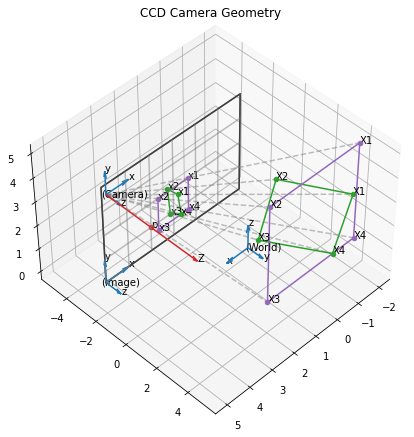

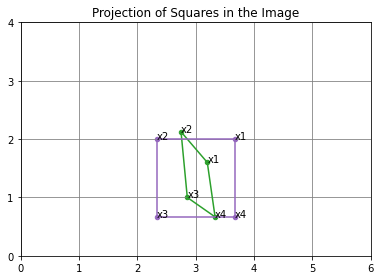

In [32]:
fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection="3d")
world_frame.draw3d()
camera_frame.draw3d()
image_frame.draw3d()
Z.draw3d()
image_plane.draw3d()
square1.draw3d(pi=image_plane.pi, C=C)
square2.draw3d(pi=image_plane.pi, C=C, color="tab:purple")
ax.view_init(elev=45.0, azim=45.0)
ax.set_title("CCD Camera Geometry")
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(IMAGE_WIDTH, IMAGE_HEIGTH))
ax = fig.gca()
image.draw()
square1.draw(**projection_kwargs)
square2.draw(**projection_kwargs, color="tab:purple")
ax.set_title("Projection of Squares in the Image")
plt.tight_layout()
plt.show()